<a href="https://colab.research.google.com/github/DiPolanski/AEDSIII/blob/main/lista07/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contrução da rede Neural**




In [60]:
import zipfile
import os

# Caminho para o arquivo zip
zip_path = "/content/archive (1).zip"
output_dir = "/content/imagens"

# Descompactar o arquivo zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

# Verificar os arquivos extraídos
os.listdir(output_dir)


['info.txt', 'dataset_personagens']

In [61]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

Versão do TensorFlow: 2.18.0


In [62]:
import keras as K
print("Versão do Keras:", K.__version__)

Versão do Keras: 3.5.0


In [64]:
# Imports
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [65]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [66]:
# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(64, (3, 3), input_shape=(64, 64, 3), activation='relu'))  # 64 filtros
classifier.add(MaxPooling2D(pool_size=(2, 2)))  # Pooling após a primeira camada

In [67]:
# Passo 2 - Segunda Camada de Convolução
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))  # Pooling após a segunda camada de convolução

In [68]:
# Passo 3 - Flattening
classifier.add(Flatten())

In [69]:
# Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [70]:
# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# **Pré Processamento**

In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [75]:
training_set = train_datagen.flow_from_directory('/content/imagens/dataset_personagens/dataset_personagens/training_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

validation_set = validation_datagen.flow_from_directory('/content/imagens/dataset_personagens/dataset_personagens/test_set',
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                        class_mode='binary')


Found 196 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


# **Treinamento**

In [77]:
# Após modificar o modelo, recompilando-o
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Agora, execute o treinamento
classifier.fit(training_set,
               steps_per_epoch = 8000,
               epochs = 5,
               validation_data = validation_set,
               validation_steps = 2000)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   7/8000 ━━━━━━━━━━━━━━━━━━━━ 35:53 269ms/step - accuracy: 0.5018 - loss: 1.0089

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8000/8000 ━━━━━━━━━━━━━━━━━━━━ 4s 265us/step - accuracy: 0.4949 - loss: 0.9242 - val_accuracy: 0.5890 - val_loss: 0.6745
Epoch 2/5
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 5s 256us/step - accuracy: 0.6020 - loss: 0.6729 - val_accuracy: 0.5753 - val_loss: 0.6475
Epoch 3/5
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 2s 216us/step - accuracy: 0.6581 - loss: 0.6094 - val_accuracy: 0.5753 - val_loss: 0.8053
Epoch 4/5
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 2s 221us/step - accuracy: 0.6123 - loss: 0.6571 - val_accuracy: 0.6438 - val_loss: 0.6074
Epoch 5/5
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 2s 217us/step - accuracy: 0.6990 - loss: 0.5907 - val_accuracy: 0.6164 - val_loss: 0.5786


# **Previsões**

In [78]:
print(training_set.class_indices)

{'bart': 0, 'homer': 1}


Se retorna 0 = bart;
Se retorna 1 = Homer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
{'bart': 0, 'homer': 1}
Predição: Bart


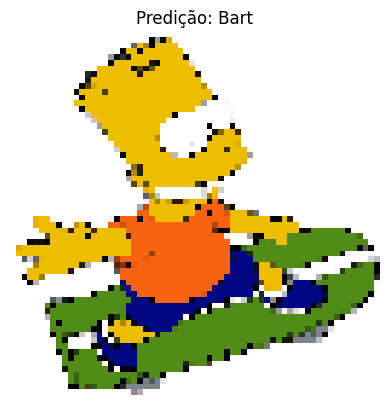

In [80]:
# Teste 01
import numpy as np
from keras.preprocessing import image
from matplotlib import pyplot as plt

# Caminho da imagem de teste
test_image_path = '/content/imagens/dataset_personagens/dataset_personagens/test_set/bart/bart13.bmp'

# Carregar e preprocessar a imagem
test_image = image.load_img(test_image_path, target_size=(64, 64))
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

# Fazer a previsão
result = classifier.predict(test_image_array)
print(training_set.class_indices)

# Ajustar a lógica de previsão para refletir as classes reais
if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

print(f"Predição: {prediction}")

# Exibir a imagem usando Matplotlib
plt.imshow(test_image)
plt.axis('off')
plt.title(f"Predição: {prediction}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
{'bart': 0, 'homer': 1}
Predição: Homer


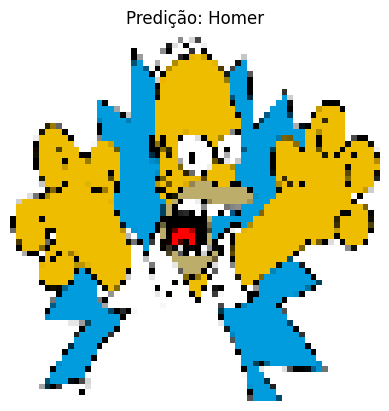

In [83]:
# Teste 02
import numpy as np
from keras.preprocessing import image
from matplotlib import pyplot as plt

# Caminho da imagem de teste
test_image_path = '/content/imagens/dataset_personagens/dataset_personagens/test_set/homer/homer16.bmp'

# Carregar e preprocessar a imagem
test_image = image.load_img(test_image_path, target_size=(64, 64))
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

# Fazer a previsão
result = classifier.predict(test_image_array)
print(training_set.class_indices)

# Ajustar a lógica de previsão para refletir as classes reais
if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

print(f"Predição: {prediction}")

# Exibir a imagem usando Matplotlib
plt.imshow(test_image)
plt.axis('off')
plt.title(f"Predição: {prediction}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
{'bart': 0, 'homer': 1}
Predição: Bart


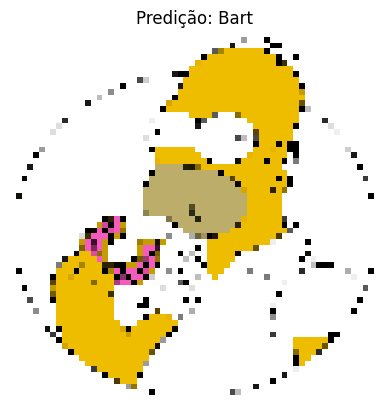

In [84]:
# Teste 03
import numpy as np
from keras.preprocessing import image
from matplotlib import pyplot as plt

# Caminho da imagem de teste
test_image_path = '/content/imagens/dataset_personagens/dataset_personagens/test_set/homer/homer8.bmp'

# Carregar e preprocessar a imagem
test_image = image.load_img(test_image_path, target_size=(64, 64))
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

# Fazer a previsão
result = classifier.predict(test_image_array)
print(training_set.class_indices)

# Ajustar a lógica de previsão para refletir as classes reais
if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

print(f"Predição: {prediction}")

# Exibir a imagem usando Matplotlib
plt.imshow(test_image)
plt.axis('off')
plt.title(f"Predição: {prediction}")
plt.show()


Obteve erro na previsão

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
{'bart': 0, 'homer': 1}
Predição: Bart


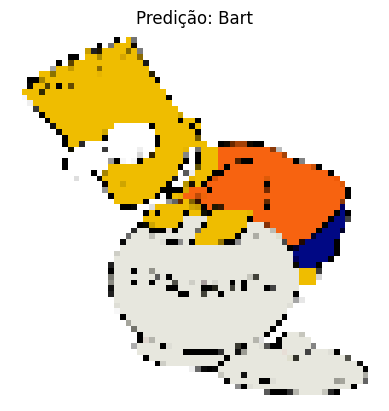

In [86]:
# Teste 03
import numpy as np
from keras.preprocessing import image
from matplotlib import pyplot as plt

# Caminho da imagem de teste
test_image_path = '/content/imagens/dataset_personagens/dataset_personagens/test_set/bart/bart24.bmp'

# Carregar e preprocessar a imagem
test_image = image.load_img(test_image_path, target_size=(64, 64))
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

# Fazer a previsão
result = classifier.predict(test_image_array)
print(training_set.class_indices)

# Ajustar a lógica de previsão para refletir as classes reais
if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

print(f"Predição: {prediction}")

# Exibir a imagem usando Matplotlib
plt.imshow(test_image)
plt.axis('off')
plt.title(f"Predição: {prediction}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
{'bart': 0, 'homer': 1}
Predição: Bart


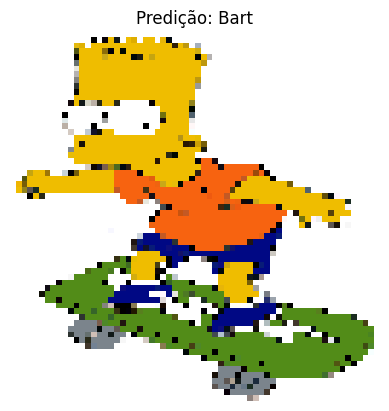

In [87]:
# Teste 03
import numpy as np
from keras.preprocessing import image
from matplotlib import pyplot as plt

# Caminho da imagem de teste
test_image_path = '/content/imagens/dataset_personagens/dataset_personagens/test_set/bart/bart8.bmp'

# Carregar e preprocessar a imagem
test_image = image.load_img(test_image_path, target_size=(64, 64))
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

# Fazer a previsão
result = classifier.predict(test_image_array)
print(training_set.class_indices)

# Ajustar a lógica de previsão para refletir as classes reais
if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

print(f"Predição: {prediction}")

# Exibir a imagem usando Matplotlib
plt.imshow(test_image)
plt.axis('off')
plt.title(f"Predição: {prediction}")
plt.show()